In [0]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import plotly.graph_objects as go


(512, 512, 3)


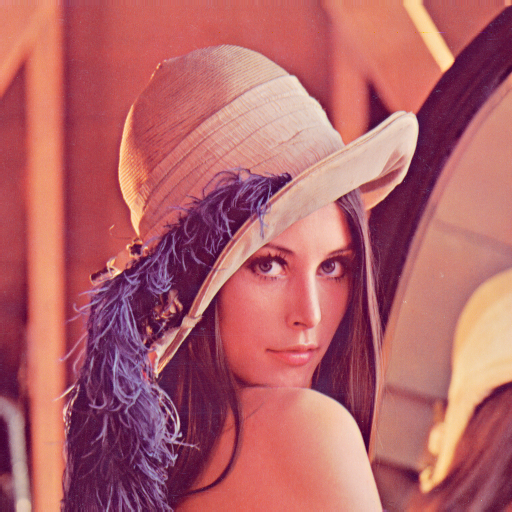

In [140]:
image=cv2.imread('lena.png')
print(image.shape)
cv2_imshow(image)

(137, 137, 4)


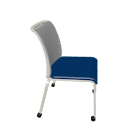

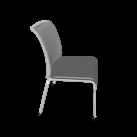

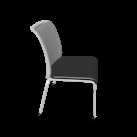

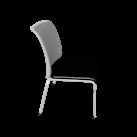

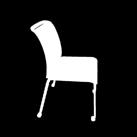

In [141]:
chair=cv2.imread('chair.png', cv2.IMREAD_UNCHANGED)
print(chair.shape)
cv2_imshow(chair)
cv2_imshow(chair[:,:,0])
cv2_imshow(chair[:,:,1])
cv2_imshow(chair[:,:,2])
cv2_imshow(chair[:,:,3])

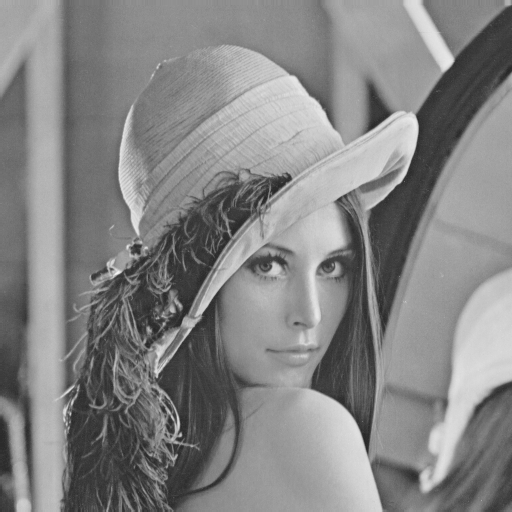

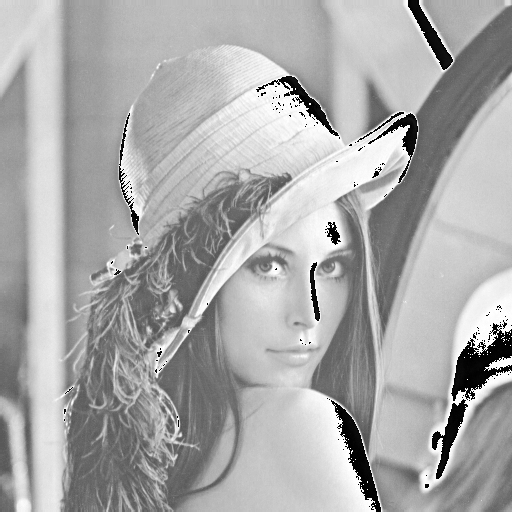

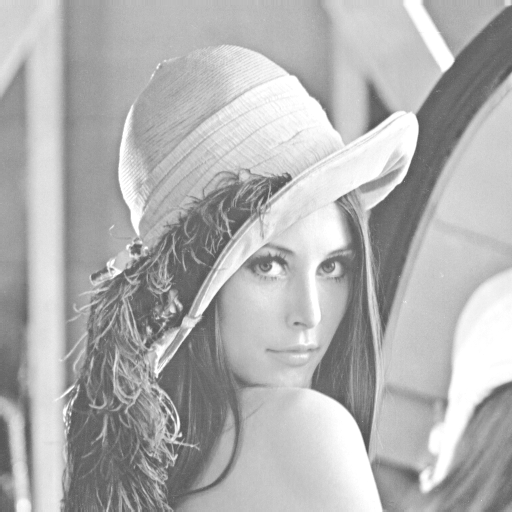

In [142]:
lena_greyscale=cv2.imread('lena.png',cv2.IMREAD_GRAYSCALE)
cv2_imshow(lena_greyscale)
cv2_imshow(lena_greyscale+45)
lena_greyscale_int = lena_greyscale.astype('int')
lena_shifted = np.clip((lena_greyscale_int+45),0,255).astype('uint8')
cv2_imshow(lena_shifted)


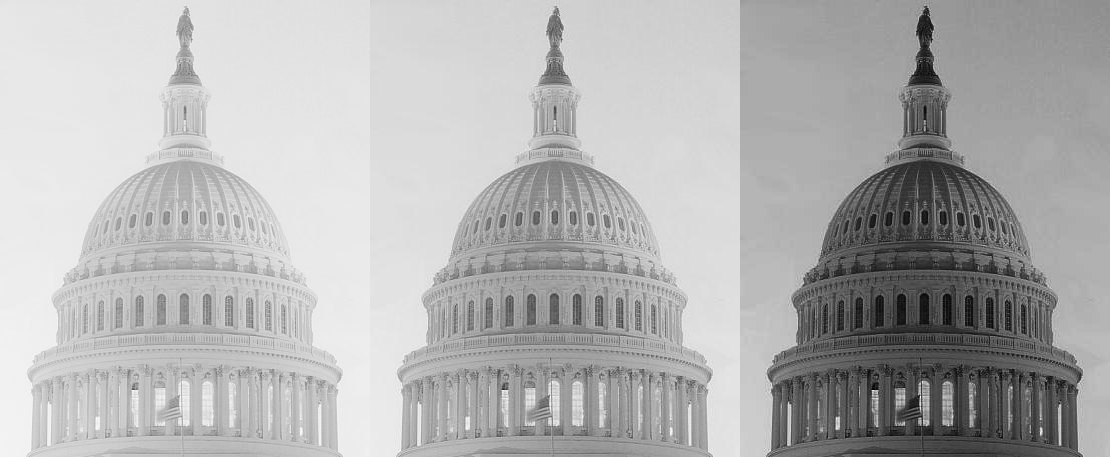

In [143]:
gamma1=cv2.imread("gamma1.jpg",cv2.IMREAD_GRAYSCALE)
gamma1_float=gamma1.astype('float64')
powerlower1=(gamma1_float/256)**0.6*256
powerhigher1=(gamma1_float/256)**2.5*256
cv2_imshow(np.hstack([powerlower1.astype('uint8'),gamma1,powerhigher1.astype('uint8')]))


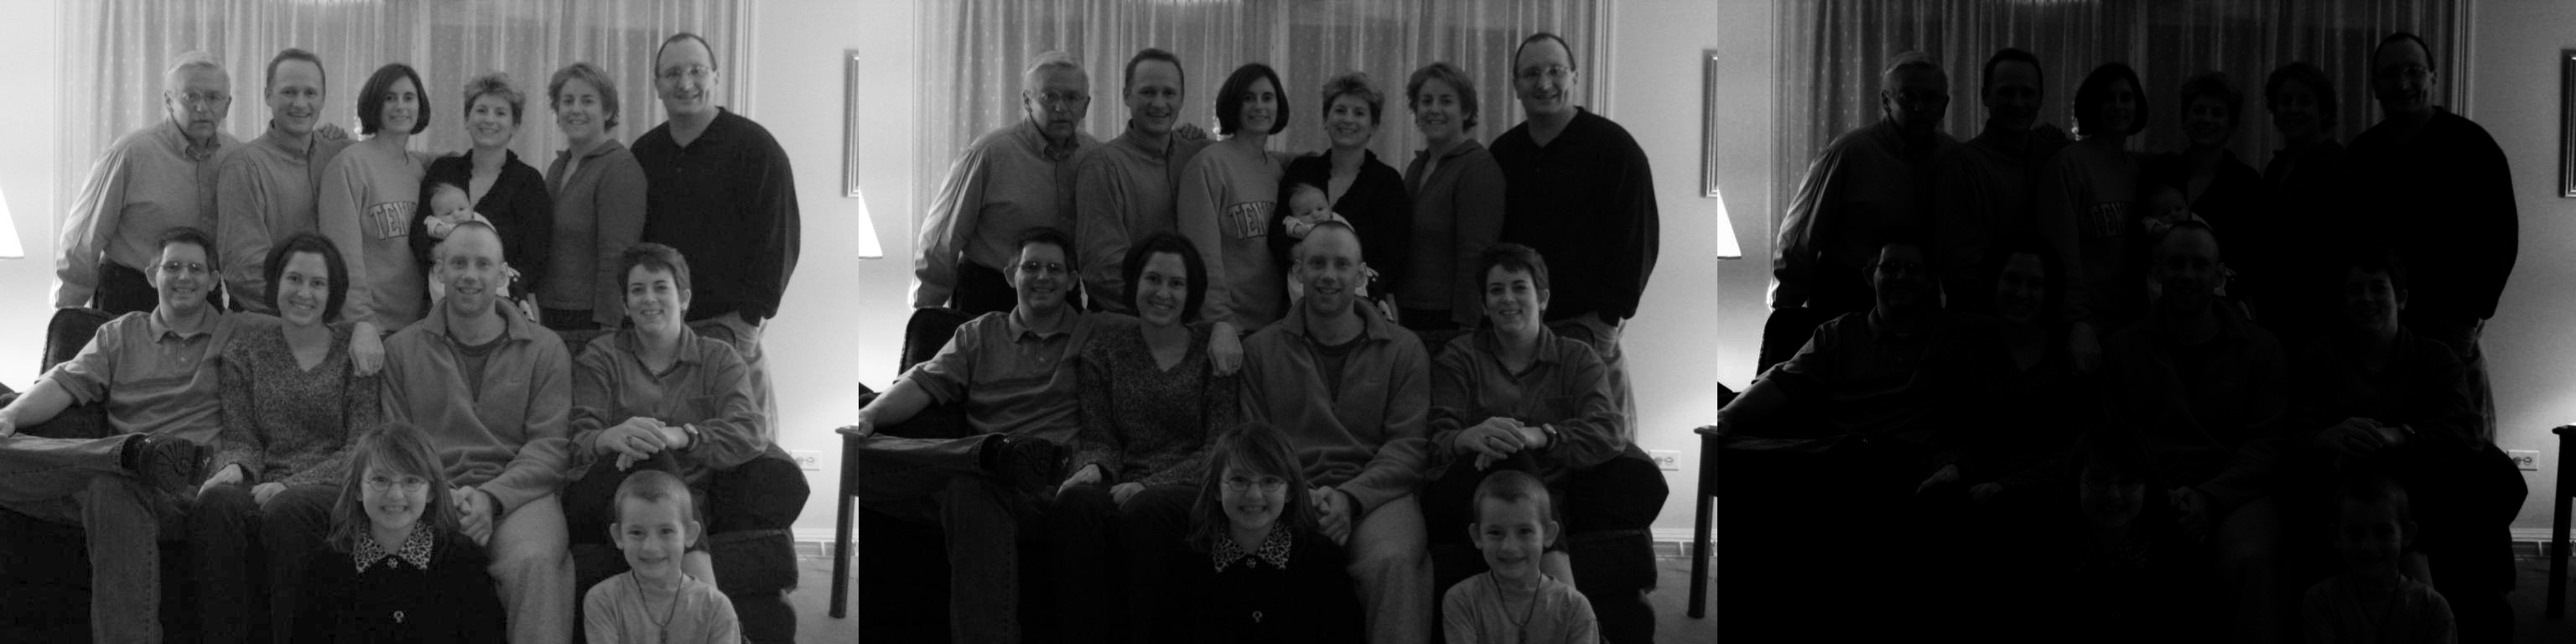

In [144]:
gamma2=cv2.imread("gamma2.jpg",cv2.IMREAD_GRAYSCALE)
gamma2_float=gamma2.astype('float64')
powerlower2=(gamma2_float/256)**0.6*256
powerhigher2=(gamma2_float/256)**2.5*256
cv2_imshow(np.hstack([powerlower2.astype('uint8'),gamma2,powerhigher2.astype('uint8')]))

In [0]:
import plotly.graph_objects as go
import plotly.express as px

In [146]:
lena_greyscale=cv2.imread('lena.png',cv2.IMREAD_GRAYSCALE)
counts,bins = np.histogram(lena_greyscale.flatten(),256,[0,256])
bins = 0.5 * (bins[:-1] + bins[1:])
fig = px.bar(x=bins, y=counts,labels={'x':'Pixel Value', 'y':'Frequency'},title='Image Histogram')
fig.show()

In [0]:
def return_histogram(I):
  if (len(I.shape) == 2 or I.shape[2] == 1):
    counts,bins = np.histogram(I.ravel(),256,[0,256])
    bins = 0.5 * (bins[:-1] + bins[1:])
    fig = px.bar(x=bins, y=counts, labels={'x':'Pixel Value', 'y':'Frequency'},title='Image Histogram')
  elif (I.shape[2] == 3):
    fig=go.Figure()
    fig.add_trace(go.Histogram(x=I[:,:,0].ravel(),name='red',marker_color='red'))
    fig.add_trace(go.Histogram(x=I[:,:,1].ravel(),name='green',marker_color='green'))
    fig.add_trace(go.Histogram(x=I[:,:,2].ravel(),name='blue',marker_color='blue'))
  return fig


In [191]:
lena = cv2.imread('lena.png')
fig=return_histogram(lena)
fig.show()

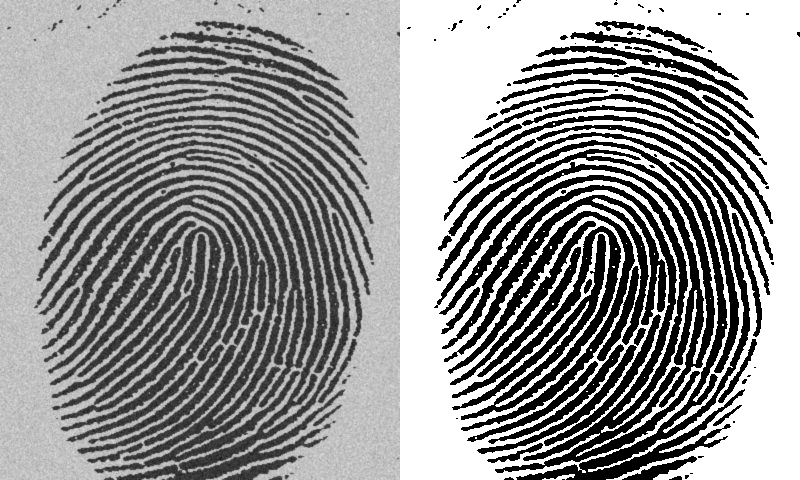

127.0


In [165]:
finger= cv2.imread('FingerPrint.jpg',cv2.IMREAD_GRAYSCALE)
figure = return_histogram(finger)
figure.show()
ret,thresh1 = cv2.threshold(finger,127,255,cv2.THRESH_BINARY)
figure = return_histogram(thresh1)
figure.show()
cv2_imshow(np.hstack([finger, thresh1]))
print(ret)

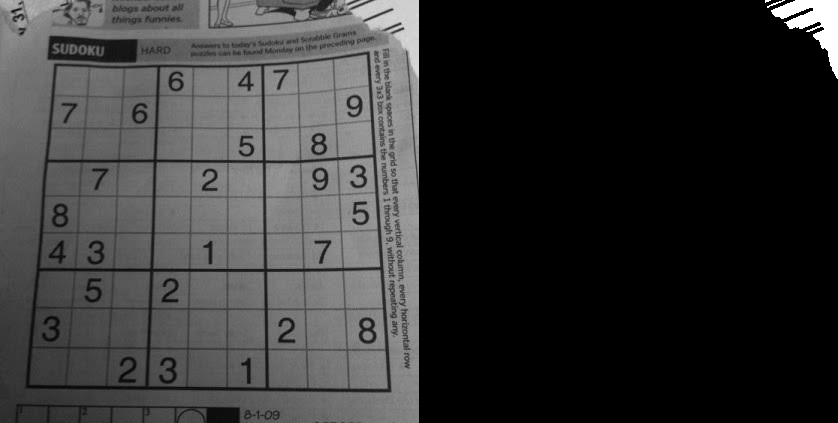

In [149]:
sudoku=cv2.imread('sudoku.jpeg',cv2.IMREAD_GRAYSCALE)
figure= return_histogram(sudoku)
figure.show()
ret,thresh1 = cv2.threshold(sudoku,180,255,cv2.THRESH_BINARY)
cv2_imshow(np.hstack([sudoku, thresh1]))

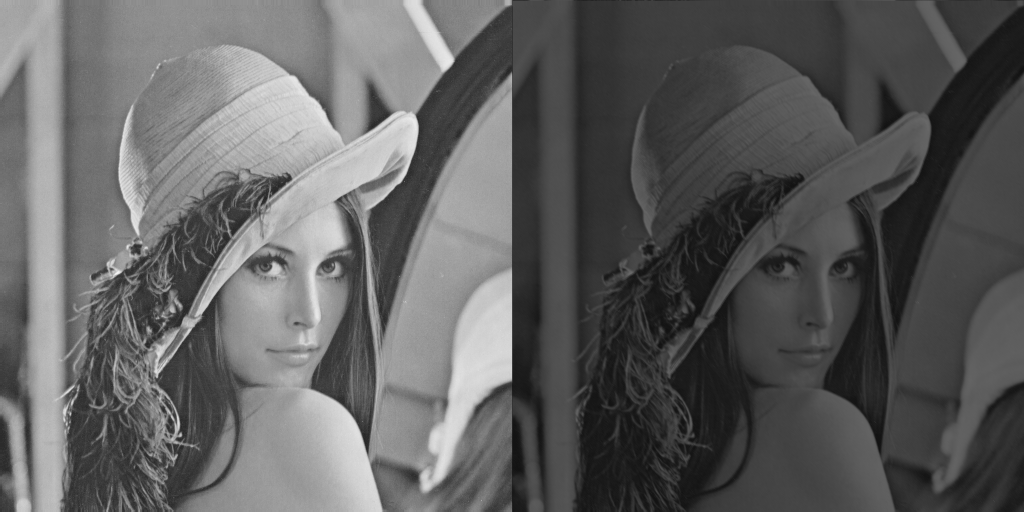

In [150]:
#convulution
def convolute(img,mask):
  ret_img=np.zeros(img.shape)
  for u in range(img.shape[0]):
    for v in range(img.shape[1]):
      for i in range(-1,1):
        for j in range(-1,1):
          ret_img[u][v] += img[u+i][v+i] * mask[i][j]
  return ret_img
mask = np.array([[1,1,1],[1,1,1],[1,1,1]])/9
cv2_imshow(np.hstack([lena_greyscale,convolute(lena_greyscale,mask)]))

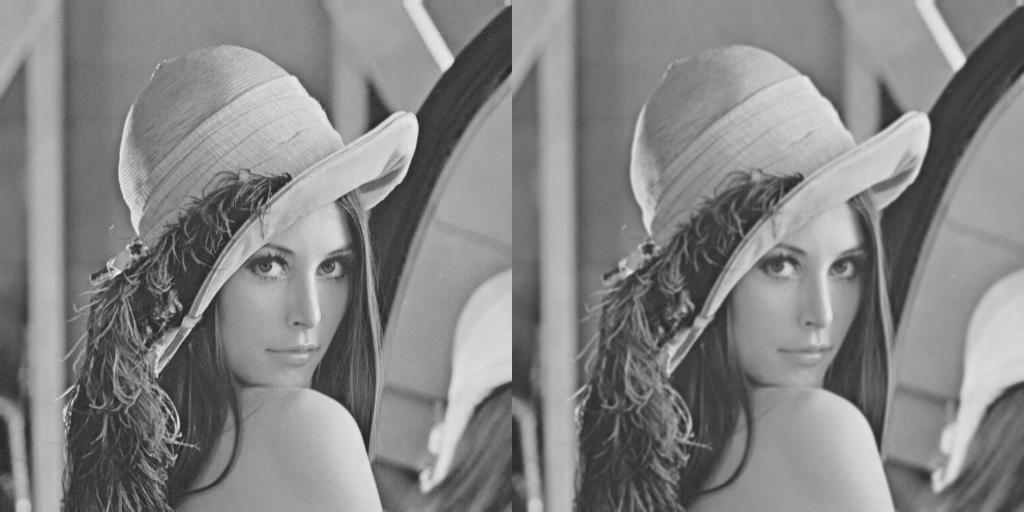

In [151]:
#smoothing
filterer=np.array([[1,1,1],[1,1,1],[1,1,1]])/9
filtered_image1 = cv2.filter2D(lena_greyscale,-1,filterer)
cv2_imshow(np.hstack([lena_greyscale,filtered_image1]))

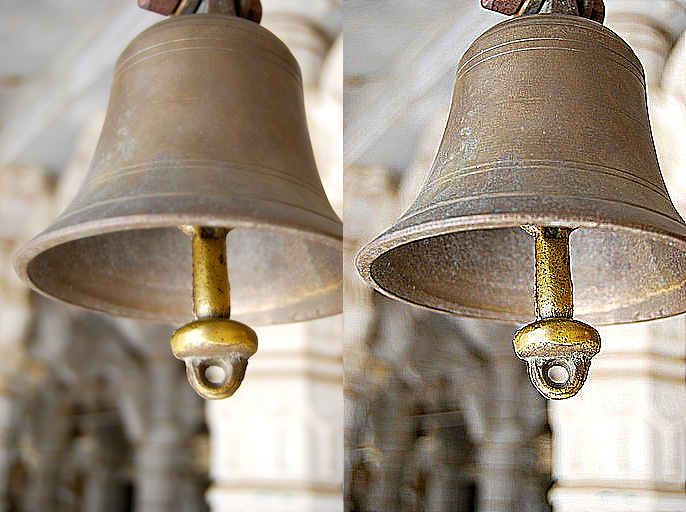

In [152]:
#sharpening
bell=cv2.imread('bell.jpg')
filterer=np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
filtered_image1 = cv2.filter2D(bell,-1,filterer)
cv2_imshow(np.hstack([bell,filtered_image1]))

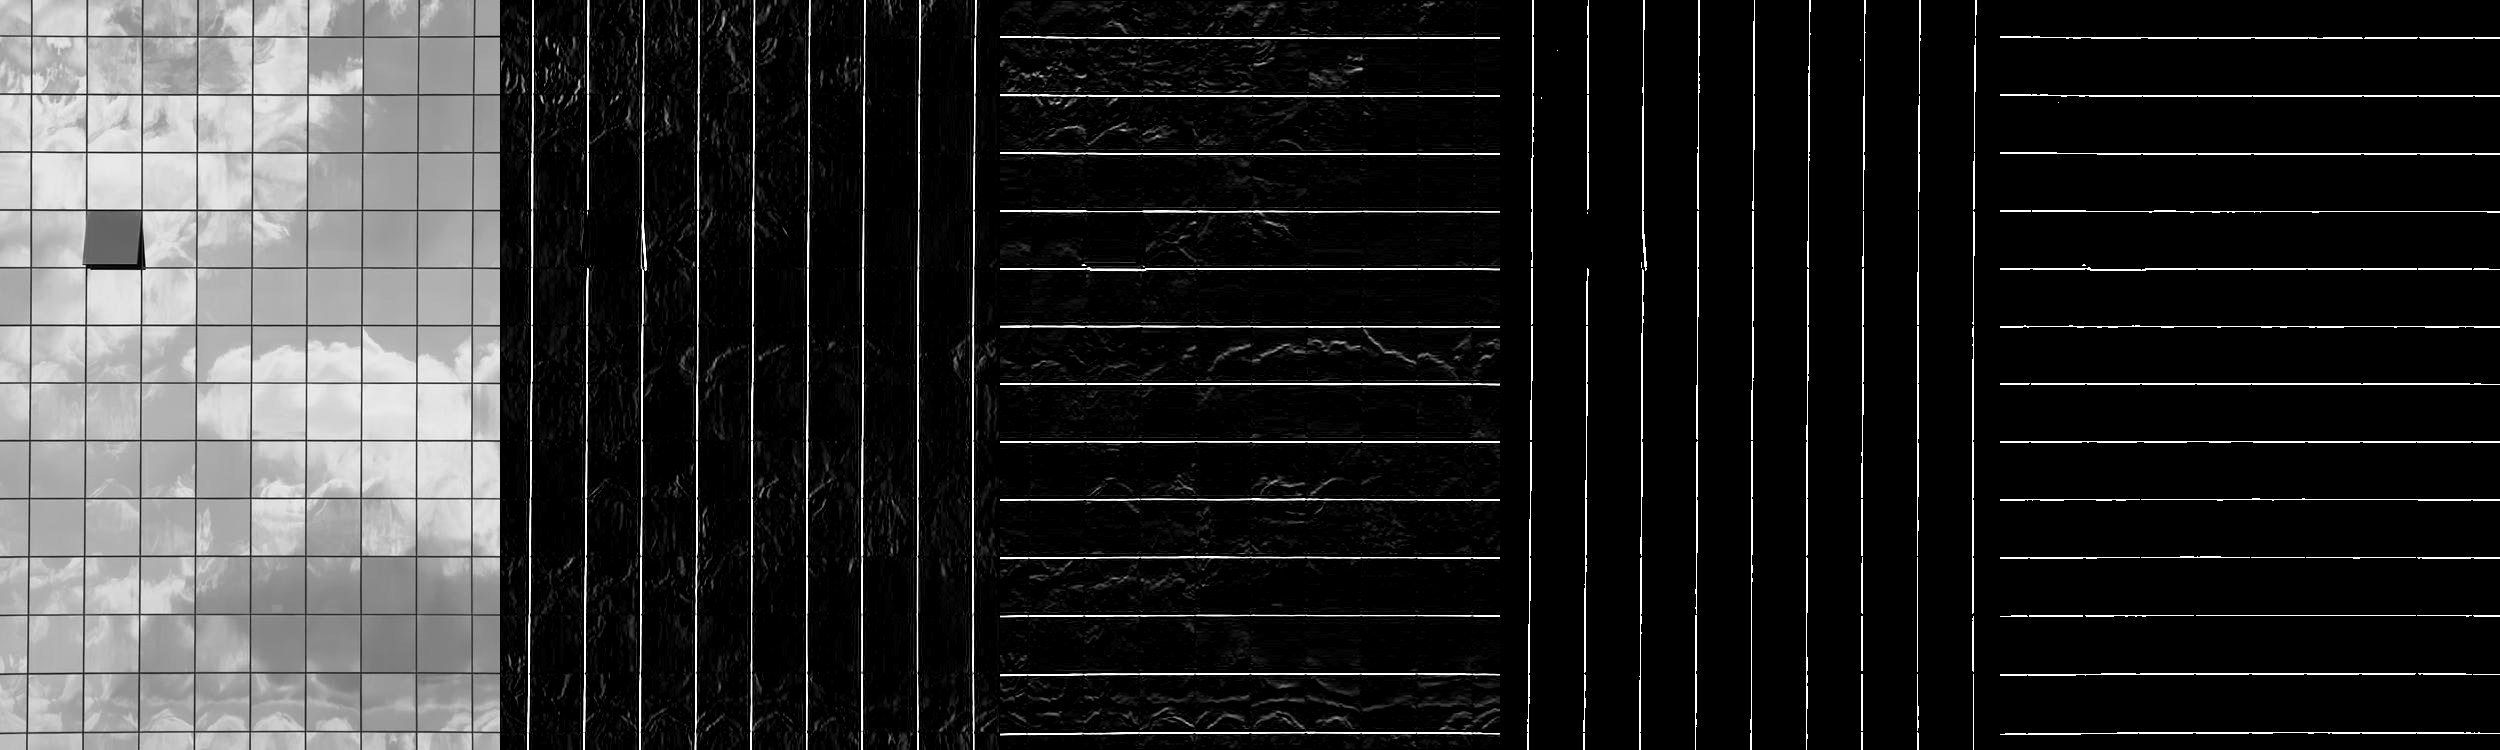

140

In [153]:
window=cv2.imread('window.jpeg',cv2.IMREAD_GRAYSCALE)
sobel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
filtered_image1 = cv2.filter2D(window,-1,sobel_x)
ret,thresh1 = cv2.threshold(filtered_image1,200,255,cv2.THRESH_BINARY)
sobel_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
filtered_image2 = cv2.filter2D(window,-1,sobel_y)
ret,thresh2 = cv2.threshold(filtered_image2,200,255,cv2.THRESH_BINARY)
cv2_imshow(np.hstack([window,filtered_image1,filtered_image2,thresh1,thresh2]))
h=1
for i in range(len(thresh1[0])):
  if (thresh1[0][i]==255)&(thresh1[0][i-1]!=255):
    h+=1
v=1
for i in range(len(thresh2.T[0])):
  if (thresh2.T[0][i]==255)&(thresh2.T[0][i-1]!=255):
    v+=1
h*v